###### Importing the packages required  ❗❕❗🔆

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Loading the dataset  📥

In [2]:
df = pd.read_csv('train.csv')
df[:10]

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0
5,59,State-gov,105363,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,0
6,70,Private,216390,9th,5,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,2653,0,40,United-States,0
7,35,Self-emp-not-inc,361888,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,Japan,0
8,28,Private,74784,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,50,United-States,0
9,28,Private,118089,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,4386,0,45,United-States,1


## DATASET INFORMATION OVERVIEW 🧾

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43957 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              43957 non-null  int64 
 1   workclass        41459 non-null  object
 2   fnlwgt           43957 non-null  int64 
 3   education        43957 non-null  object
 4   educational-num  43957 non-null  int64 
 5   marital-status   43957 non-null  object
 6   occupation       41451 non-null  object
 7   relationship     43957 non-null  object
 8   race             43957 non-null  object
 9   gender           43957 non-null  object
 10  capital-gain     43957 non-null  int64 
 11  capital-loss     43957 non-null  int64 
 12  hours-per-week   43957 non-null  int64 
 13  native-country   43194 non-null  object
 14  income_>50K      43957 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


### EMPTY OR NULL VALUE CHECK() : 🧐

In [4]:
df.isna().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

###  DEALING WITH NULL OR EMPTY VALUES 😈 ✂✂

In [5]:
df = df.dropna()
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income_>50K        0
dtype: int64

In [6]:
print("shape of dataset")
print("ROWS:", df.shape[0],"\nColumns:", df.shape[1])
df[:5]

shape of dataset
ROWS: 40727 
Columns: 15


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


## columns in dataset:  📋

In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_>50K'],
      dtype='object')

In [7]:
dfplot = df[['workclass','education','marital-status','occupation', 'relationship','race', 'gender']]
dfplot[:3]

,workclass,education,marital-status,occupation,relationship,race,gender
0,Private,Doctorate,Divorced,Exec-managerial,Not-in-family,White,Male
1,Private,12th,Never-married,Other-service,Own-child,White,Male
2,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male


# EDA 📊

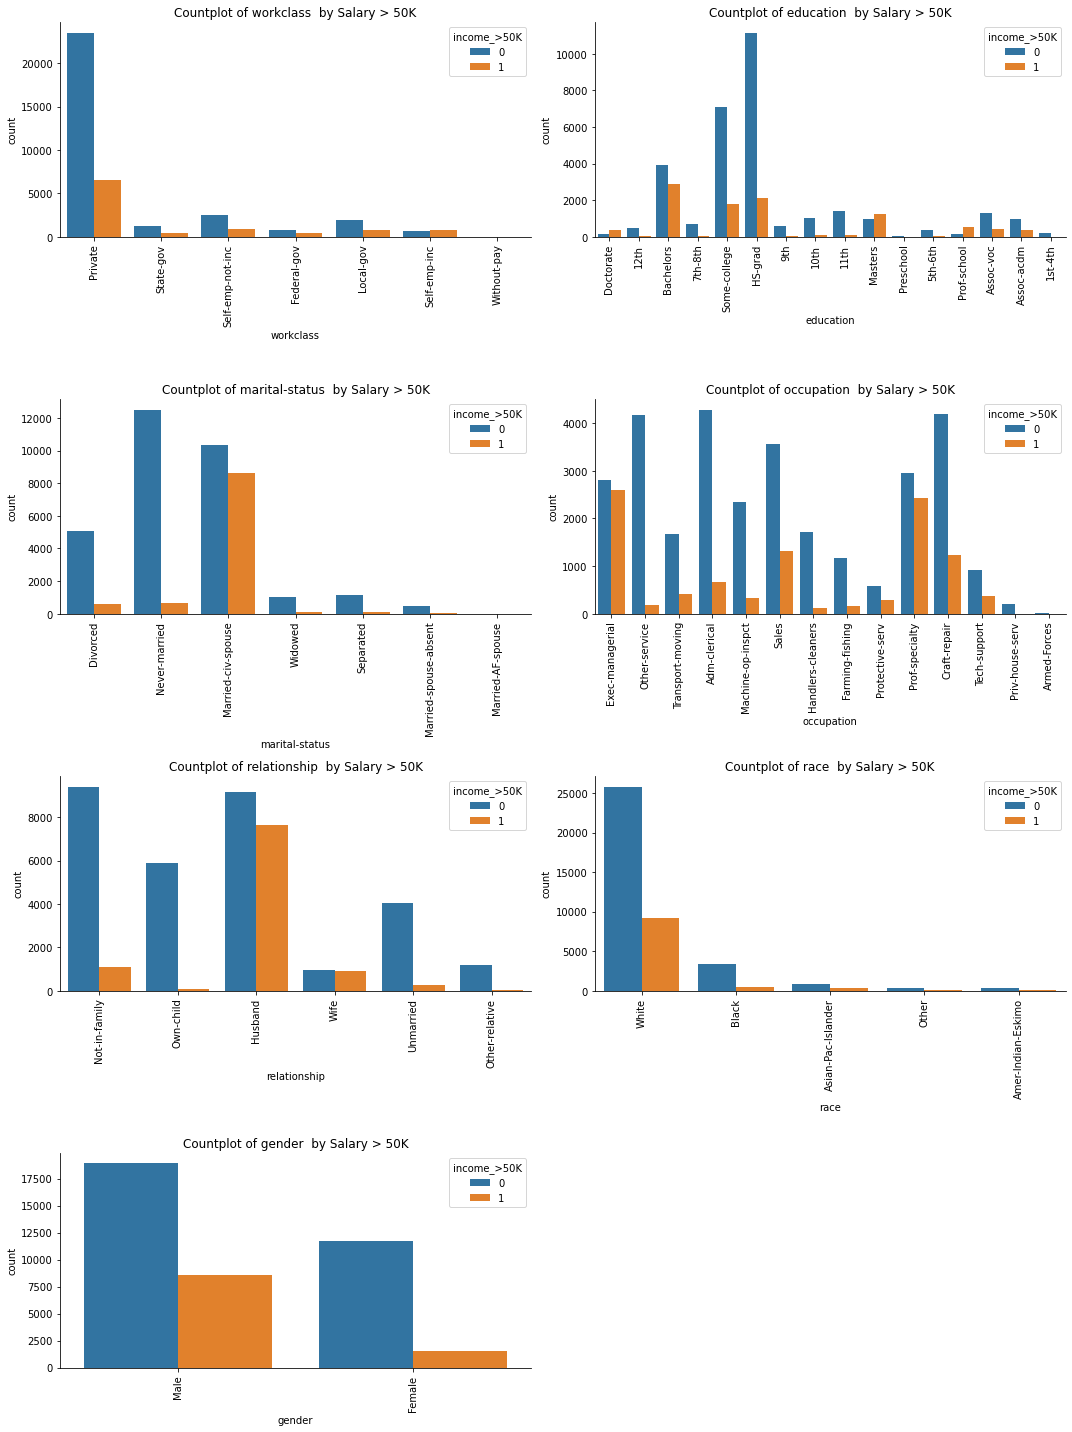

In [12]:
plt.figure(figsize=[15,20])
n=1
for f in dfplot.columns:
    plt.subplot(4,2,n)
    sns.countplot(x=f, hue='income_>50K', data=df)
    sns.despine()
    plt.xticks(rotation = 90)
    plt.title("Countplot of {}  by Salary > 50K".format(f))
    n=n+1
plt.tight_layout()
plt.show()


# 🔰 HERE WE START 

######  correlation check

<AxesSubplot:>

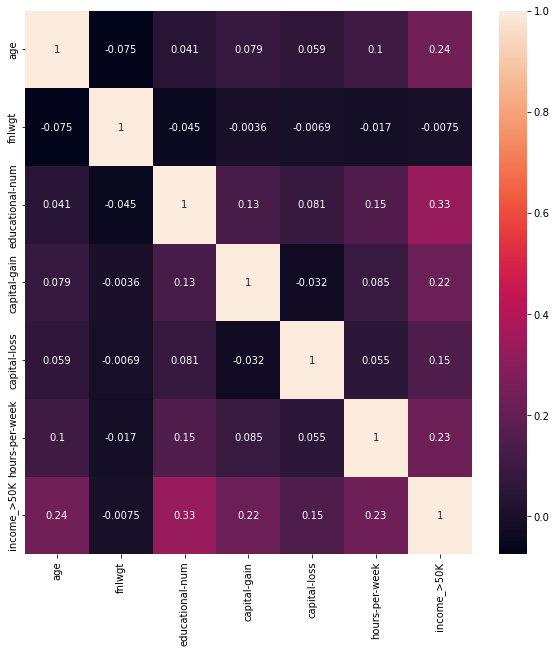

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

df.drop(columns=['fnlwgt'], inplace=True, axis = 1)


In [28]:
df[:3]

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1


## ENCODING THE CATEGORICAL COLUMNS 🔀

In [41]:
featuresdf = pd.get_dummies(data=df,columns=['workclass','education','marital-status','occupation','relationship','race','gender','native-country'])
featuresdf

,age,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,16,99999,0,60,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,17,8,0,0,15,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,31,13,0,0,40,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,58,4,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,10,0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,13,0,0,50,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
43953,19,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
43954,30,10,0,0,58,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
43955,46,13,0,0,35,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


##### SELECTION OF COLUMNS FOR INPUT AND OUTPUT 🟢🔴

In [43]:
X = featuresdf.drop(columns=['income_>50K'])
X[:3]

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,16,99999,0,60,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,17,8,0,0,15,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,31,13,0,0,40,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [44]:
y = featuresdf["income_>50K"]
y[:3]

0    1
1    0
2    1
Name: income_>50K, dtype: int64

# SPLITTING DATASET FOR TRAIN AND TEST ✂💔😂

In [45]:
X_train,X_test,y_train, y_test =train_test_split(X,y,test_size=0.25,random_state=42)

###### SVC implementation

In [46]:
smodel = SVC()

In [47]:
smodel.fit(X_train,y_train)

SVC()

In [48]:
svcy_pred = smodel.predict(X_test)

In [49]:
accuracy_score(y_test,svcy_pred)

0.7926733451188371

In [53]:
cmsvc = confusion_matrix(y_test,svcy_pred)
cmsvc

array([[7412,  240],
       [1871,  659]], dtype=int64)

Text(33.0, 0.5, 'ACTUAL')

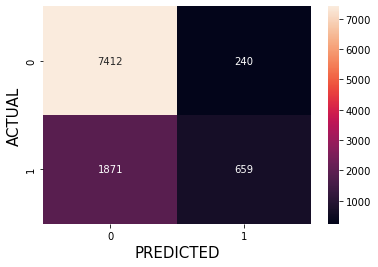

In [68]:
sns.heatmap(cmsvc,annot=True,fmt='.5g')
plt.xlabel('PREDICTED', fontsize = 15)
plt.ylabel('ACTUAL', fontsize = 15)

In [92]:
svcreport = classification_report(y_test,svcy_pred)
print(svcreport)

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7652
           1       0.73      0.26      0.38      2530

    accuracy                           0.79     10182
   macro avg       0.77      0.61      0.63     10182
weighted avg       0.78      0.79      0.75     10182



###### Naive Bayes Gaussian Algorithm Implementation 

In [69]:
ngmodel = GaussianNB()

In [70]:
ngmodel.fit(X_train,y_train)

GaussianNB()

In [71]:
ngpredict = ngmodel.predict(X_test)

In [72]:
accuracy_score(y_test,ngpredict)

0.8043606364172068

In [74]:
cmng = confusion_matrix(y_test,ngpredict)
cmng

array([[6198, 1454],
       [ 538, 1992]], dtype=int64)

Text(33.0, 0.5, 'ACTUAL')

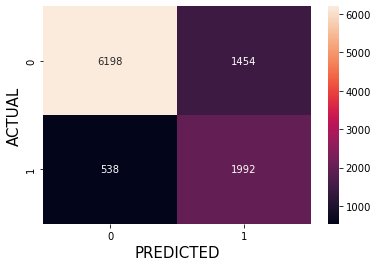

In [75]:
sns.heatmap(cmng,annot=True,fmt='.5g')
plt.xlabel('PREDICTED', fontsize = 15)
plt.ylabel('ACTUAL', fontsize = 15)

In [94]:
nbGaussian_report = classification_report(y_test,ngpredict)
print(nbGaussian_report)

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      7652
           1       0.58      0.79      0.67      2530

    accuracy                           0.80     10182
   macro avg       0.75      0.80      0.76     10182
weighted avg       0.84      0.80      0.81     10182



###### Naive bayes Multinomial algorithm implementation

In [77]:
nb_Multi = MultinomialNB()

In [78]:
nb_Multi.fit(X_train,y_train)

MultinomialNB()

In [79]:
nbMul_pred = nb_Multi.predict(X_test)

In [81]:
nbMulti_cm = confusion_matrix(y_test,nbMul_pred)
nbMulti_cm

array([[7344,  308],
       [1991,  539]], dtype=int64)

Text(33.0, 0.5, 'ACTUAL')

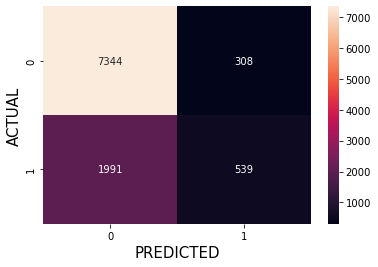

In [82]:
sns.heatmap(nbMulti_cm,annot=True,fmt='.5g')
plt.xlabel('PREDICTED', fontsize = 15)
plt.ylabel('ACTUAL', fontsize = 15)

In [83]:
accuracy_score(y_test,nbMul_pred)

0.7742093891180515

In [96]:
nb_MultiNomial_report = classification_report(y_test,nbMul_pred)
print(nb_MultiNomial_report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.86      7652
           1       0.64      0.21      0.32      2530

    accuracy                           0.77     10182
   macro avg       0.71      0.59      0.59     10182
weighted avg       0.75      0.77      0.73     10182



###### Naive Bayes Bernaulli Algorithm Implementation

In [85]:
nb_Ber = BernoulliNB()

In [86]:
nb_Ber.fit(X_train,y_train)

BernoulliNB()

In [87]:
nb_Ber_pred = nb_Ber.predict(X_test)

In [88]:
nb_BerCM = confusion_matrix(y_test,nb_Ber_pred)

Text(33.0, 0.5, 'ACTUAL')

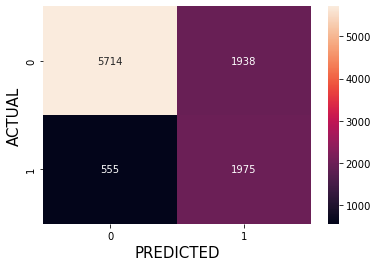

In [89]:
sns.heatmap(nb_BerCM,annot=True,fmt='.5g')
plt.xlabel('PREDICTED', fontsize = 15)
plt.ylabel('ACTUAL', fontsize = 15)

In [90]:
accuracy_score(y_test,nb_Ber_pred)

0.7551561579257513

In [97]:
nbBerbaulli_report = classification_report(y_test,nb_Ber_pred)
print(nbBerbaulli_report)

              precision    recall  f1-score   support

           0       0.91      0.75      0.82      7652
           1       0.50      0.78      0.61      2530

    accuracy                           0.76     10182
   macro avg       0.71      0.76      0.72     10182
weighted avg       0.81      0.76      0.77     10182



##### ALL REPORTS TOGETHER

In [113]:
print('SVC ALGO REPORT')
print(svcreport)
print("-"*60)
print("Gausssian Algo REport")
print(nbGaussian_report)
print("-"*60)
print("Multinomial Algo REport")
print(nb_MultiNomial_report)
print("-"*60)
print("Bernaulli Algo REport")
print(nbBerbaulli_report)


SVC ALGO REPORT
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7652
           1       0.73      0.26      0.38      2530

    accuracy                           0.79     10182
   macro avg       0.77      0.61      0.63     10182
weighted avg       0.78      0.79      0.75     10182

------------------------------------------------------------
Gausssian Algo REport
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      7652
           1       0.58      0.79      0.67      2530

    accuracy                           0.80     10182
   macro avg       0.75      0.80      0.76     10182
weighted avg       0.84      0.80      0.81     10182

------------------------------------------------------------
Multinomial Algo REport
              precision    recall  f1-score   support

           0       0.79      0.96      0.86      7652
           1       0.64      0.21      0.32      2530

# 📜🖋📊
## AS ABOVE 
## THE ACCURACY OF GAUSSIAN ALGORITHM AMONG ALL IS TO BE OBSERVED HIGH
## SO WE CAN PREFER GAUSSIAN CLASSIFICATION ALGORITHM FOR CLASSIFICATION PURPOSE....